In [1]:
!git clone https://github.com/Jsrsky/machine_unlearning_experiments
%cd machine_unlearning_experiments/experiments/mnist/sisa

Cloning into 'machine_unlearning_experiments'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 390 (delta 0), reused 0 (delta 0), pack-reused 359 (from 1)
Receiving objects: 100% (390/390), 293.45 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Updating files: 100% (77/77), done.
/kaggle/working/machine_unlearning_experiments/experiments/mnist/sisa


## Dependencies

In [2]:
import sys
import json
from pathlib import Path
from torchvision import datasets

## Utils

In [3]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: /kaggle/working/machine_unlearning_experiments


In [4]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Init model
from models.simple_cnn import init_model_cnn

# Create sisa structure
from methods.sisa.sisa_utils import create_sisa_structure

# Recreate sisa dataloaders from json file
from methods.sisa.sisa_utils import recreate_sisa_dataloaders

# SISA train & test loop
from methods.sisa.sisa_train_test import sisa_train, sisa_test, retrain_sisa_framework

# Aggregate SISA models, via weighted voting
from methods.sisa.sisa_utils import evaluate_aggregated_model, update_sisa_structure


Device used: cuda


## Parameters (arbitrary chosen)

In [35]:
BATCH_SIZE = 64

LEARNING_RATE = 0.001

EPOCHS = 10

SHARDS = 3

SLICES = 5

# SISA structure

## Get data transform

In [23]:
*_, transform = init_model_cnn()
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Init model...
Done initializing model.
Model ID: 132130241393664, Optimizer ID: 132130241392416, Criterion ID: 132130241393184


## Load dataset

In [24]:
train_dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)

## Create SISA structure

In [25]:
create_sisa_structure(train_dataset, shards=SHARDS, slices_per_shard=SLICES)

SISA structure saved to sisa_structure.json


In [26]:
sisa_structure_file = 'sisa_structure.json'

## Prepare DataLoaders from json file

In [27]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=sisa_structure_file,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

# Train using SISA framework

## Models output path

In [28]:
save_models_metrics_dir = './sisa_models'

## Call train

In [36]:
import time
start_time = time.perf_counter()

sisa_train(
    dataloaders=dataloaders, 
    num_epochs=EPOCHS, 
    save_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    learning_rate=LEARNING_RATE,
    )

end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Training shard: shard_0
Init model...
Done initializing model.
Model ID: 132129988203408, Optimizer ID: 132131009992096, Criterion ID: 132131009992144
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.30it/s]


Epoch [1/10], Train Loss: 0.8363, Train Accuracy: 0.7506, Val Loss: 0.2917, Val Accuracy: 0.9125
Epoch 1: New best validation accuracy: 0.9125. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.70it/s]


Epoch [2/10], Train Loss: 0.2173, Train Accuracy: 0.9406, Val Loss: 0.1714, Val Accuracy: 0.9525
Epoch 2: New best validation accuracy: 0.9525. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.14it/s]


Epoch [3/10], Train Loss: 0.1344, Train Accuracy: 0.9611, Val Loss: 0.1911, Val Accuracy: 0.9425


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.24it/s]


Epoch [4/10], Train Loss: 0.0899, Train Accuracy: 0.9728, Val Loss: 0.1325, Val Accuracy: 0.9475


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.49it/s]


Epoch [5/10], Train Loss: 0.0612, Train Accuracy: 0.9831, Val Loss: 0.1221, Val Accuracy: 0.9675
Epoch 5: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.22it/s]


Epoch [6/10], Train Loss: 0.0530, Train Accuracy: 0.9822, Val Loss: 0.1408, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.74it/s]


Epoch [7/10], Train Loss: 0.0325, Train Accuracy: 0.9919, Val Loss: 0.1310, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.48it/s]


Epoch [8/10], Train Loss: 0.0253, Train Accuracy: 0.9928, Val Loss: 0.1360, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.77it/s]


Epoch [9/10], Train Loss: 0.0161, Train Accuracy: 0.9969, Val Loss: 0.1461, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 76.26it/s]


Epoch [10/10], Train Loss: 0.0240, Train Accuracy: 0.9931, Val Loss: 0.1279, Val Accuracy: 0.9700
Epoch 10: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_0_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.87it/s]


Epoch [1/10], Train Loss: 0.1146, Train Accuracy: 0.9658, Val Loss: 0.0675, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.53it/s]


Epoch [2/10], Train Loss: 0.0542, Train Accuracy: 0.9836, Val Loss: 0.0594, Val Accuracy: 0.9825
Epoch 2: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.01it/s]


Epoch [3/10], Train Loss: 0.0259, Train Accuracy: 0.9928, Val Loss: 0.0395, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.32it/s]


Epoch [4/10], Train Loss: 0.0188, Train Accuracy: 0.9956, Val Loss: 0.0505, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.08it/s]


Epoch [5/10], Train Loss: 0.0068, Train Accuracy: 0.9994, Val Loss: 0.0596, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 72.02it/s]


Epoch [6/10], Train Loss: 0.0051, Train Accuracy: 0.9994, Val Loss: 0.0537, Val Accuracy: 0.9850
Epoch 6: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 87.91it/s]


Epoch [7/10], Train Loss: 0.0027, Train Accuracy: 1.0000, Val Loss: 0.0616, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.18it/s]


Epoch [8/10], Train Loss: 0.0019, Train Accuracy: 1.0000, Val Loss: 0.0638, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.22it/s]


Epoch [9/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.0635, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.75it/s]


Epoch [10/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0637, Val Accuracy: 0.9775
Training complete for ./sisa_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.62it/s]


Epoch [1/10], Train Loss: 0.1150, Train Accuracy: 0.9678, Val Loss: 0.0765, Val Accuracy: 0.9750
Epoch 1: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.64it/s]


Epoch [2/10], Train Loss: 0.0457, Train Accuracy: 0.9872, Val Loss: 0.0800, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.04it/s]


Epoch [3/10], Train Loss: 0.0188, Train Accuracy: 0.9950, Val Loss: 0.0834, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.66it/s]


Epoch [4/10], Train Loss: 0.0109, Train Accuracy: 0.9964, Val Loss: 0.0716, Val Accuracy: 0.9800
Epoch 4: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.09it/s]


Epoch [5/10], Train Loss: 0.0036, Train Accuracy: 0.9997, Val Loss: 0.0716, Val Accuracy: 0.9825
Epoch 5: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.96it/s]


Epoch [6/10], Train Loss: 0.0030, Train Accuracy: 0.9997, Val Loss: 0.0701, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.99it/s]


Epoch [7/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0712, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.97it/s]


Epoch [8/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0758, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.14it/s]


Epoch [9/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0757, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.25it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0768, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 80.18it/s]


Epoch [1/10], Train Loss: 0.0931, Train Accuracy: 0.9753, Val Loss: 0.0571, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.37it/s]


Epoch [2/10], Train Loss: 0.0255, Train Accuracy: 0.9914, Val Loss: 0.0672, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.03it/s]


Epoch [3/10], Train Loss: 0.0193, Train Accuracy: 0.9939, Val Loss: 0.0733, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.13it/s]


Epoch [4/10], Train Loss: 0.0042, Train Accuracy: 0.9994, Val Loss: 0.0530, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.37it/s]


Epoch [5/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0495, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.73it/s]


Epoch [6/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0503, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.69it/s]


Epoch [7/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0503, Val Accuracy: 0.9875
Epoch 7: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.51it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0501, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.69it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0508, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.36it/s]


Epoch [10/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0510, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.49it/s]


Epoch [1/10], Train Loss: 0.0840, Train Accuracy: 0.9769, Val Loss: 0.0563, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.27it/s]


Epoch [2/10], Train Loss: 0.0257, Train Accuracy: 0.9917, Val Loss: 0.0644, Val Accuracy: 0.9850
Epoch 2: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.50it/s]


Epoch [3/10], Train Loss: 0.0130, Train Accuracy: 0.9961, Val Loss: 0.0484, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.22it/s]


Epoch [4/10], Train Loss: 0.0049, Train Accuracy: 0.9992, Val Loss: 0.0614, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.09it/s]


Epoch [5/10], Train Loss: 0.0023, Train Accuracy: 0.9994, Val Loss: 0.0616, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.60it/s]


Epoch [6/10], Train Loss: 0.0017, Train Accuracy: 0.9994, Val Loss: 0.0656, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.13it/s]


Epoch [7/10], Train Loss: 0.0012, Train Accuracy: 0.9997, Val Loss: 0.0708, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.78it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0699, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.77it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0711, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.75it/s]


Epoch [10/10], Train Loss: 0.0002, Train Accuracy: 1.0000, Val Loss: 0.0714, Val Accuracy: 0.9850
Training complete for ./sisa_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_0_final_model.pth
Training shard: shard_1
Init model...
Done initializing model.
Model ID: 132130241332272, Optimizer ID: 132129988204848, Criterion ID: 132129988209600
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.93it/s]


Epoch [1/10], Train Loss: 0.9445, Train Accuracy: 0.7131, Val Loss: 0.3399, Val Accuracy: 0.9125
Epoch 1: New best validation accuracy: 0.9125. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.60it/s]


Epoch [2/10], Train Loss: 0.2489, Train Accuracy: 0.9303, Val Loss: 0.1803, Val Accuracy: 0.9400
Epoch 2: New best validation accuracy: 0.9400. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.06it/s]


Epoch [3/10], Train Loss: 0.1573, Train Accuracy: 0.9533, Val Loss: 0.1320, Val Accuracy: 0.9550
Epoch 3: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.21it/s]


Epoch [4/10], Train Loss: 0.1085, Train Accuracy: 0.9689, Val Loss: 0.1414, Val Accuracy: 0.9500


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.51it/s]


Epoch [5/10], Train Loss: 0.0850, Train Accuracy: 0.9772, Val Loss: 0.1530, Val Accuracy: 0.9450


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.97it/s]


Epoch [6/10], Train Loss: 0.0609, Train Accuracy: 0.9839, Val Loss: 0.1041, Val Accuracy: 0.9650
Epoch 6: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.22it/s]


Epoch [7/10], Train Loss: 0.0570, Train Accuracy: 0.9839, Val Loss: 0.1017, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.29it/s]


Epoch [8/10], Train Loss: 0.0358, Train Accuracy: 0.9900, Val Loss: 0.0949, Val Accuracy: 0.9700
Epoch 8: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.89it/s]


Epoch [9/10], Train Loss: 0.0217, Train Accuracy: 0.9961, Val Loss: 0.1014, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 89.52it/s]


Epoch [10/10], Train Loss: 0.0161, Train Accuracy: 0.9978, Val Loss: 0.1010, Val Accuracy: 0.9575
Training complete for ./sisa_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.51it/s]


Epoch [1/10], Train Loss: 0.1077, Train Accuracy: 0.9639, Val Loss: 0.1527, Val Accuracy: 0.9475
Epoch 1: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.32it/s]


Epoch [2/10], Train Loss: 0.0514, Train Accuracy: 0.9825, Val Loss: 0.1073, Val Accuracy: 0.9575
Epoch 2: New best validation accuracy: 0.9575. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.49it/s]


Epoch [3/10], Train Loss: 0.0245, Train Accuracy: 0.9919, Val Loss: 0.1132, Val Accuracy: 0.9625
Epoch 3: New best validation accuracy: 0.9625. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 88.43it/s]


Epoch [4/10], Train Loss: 0.0219, Train Accuracy: 0.9933, Val Loss: 0.1351, Val Accuracy: 0.9600


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.34it/s]


Epoch [5/10], Train Loss: 0.0092, Train Accuracy: 0.9986, Val Loss: 0.1044, Val Accuracy: 0.9675
Epoch 5: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.81it/s]


Epoch [6/10], Train Loss: 0.0075, Train Accuracy: 0.9981, Val Loss: 0.1155, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.82it/s]


Epoch [7/10], Train Loss: 0.0040, Train Accuracy: 1.0000, Val Loss: 0.1075, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 85.71it/s]


Epoch [8/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.1113, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.44it/s]


Epoch [9/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.1118, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.55it/s]


Epoch [10/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1085, Val Accuracy: 0.9675
Training complete for ./sisa_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.98it/s]


Epoch [1/10], Train Loss: 0.1009, Train Accuracy: 0.9683, Val Loss: 0.0833, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.62it/s]


Epoch [2/10], Train Loss: 0.0396, Train Accuracy: 0.9881, Val Loss: 0.0620, Val Accuracy: 0.9750
Epoch 2: New best validation accuracy: 0.9750. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.47it/s]


Epoch [3/10], Train Loss: 0.0267, Train Accuracy: 0.9911, Val Loss: 0.0635, Val Accuracy: 0.9800
Epoch 3: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.66it/s]


Epoch [4/10], Train Loss: 0.0135, Train Accuracy: 0.9956, Val Loss: 0.0571, Val Accuracy: 0.9850
Epoch 4: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.89it/s]


Epoch [5/10], Train Loss: 0.0073, Train Accuracy: 0.9986, Val Loss: 0.0571, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.19it/s]


Epoch [6/10], Train Loss: 0.0036, Train Accuracy: 1.0000, Val Loss: 0.0622, Val Accuracy: 0.9775


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 106.14it/s]


Epoch [7/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.0544, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.05it/s]


Epoch [8/10], Train Loss: 0.0018, Train Accuracy: 0.9997, Val Loss: 0.0521, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.36it/s]


Epoch [9/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0578, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.21it/s]


Epoch [10/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0564, Val Accuracy: 0.9800
Training complete for ./sisa_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 78.92it/s]


Epoch [1/10], Train Loss: 0.0889, Train Accuracy: 0.9703, Val Loss: 0.0470, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.10it/s]


Epoch [2/10], Train Loss: 0.0317, Train Accuracy: 0.9886, Val Loss: 0.0418, Val Accuracy: 0.9925
Epoch 2: New best validation accuracy: 0.9925. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.34it/s]


Epoch [3/10], Train Loss: 0.0120, Train Accuracy: 0.9972, Val Loss: 0.0333, Val Accuracy: 0.9950
Epoch 3: New best validation accuracy: 0.9950. Model saved to ./sisa_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.74it/s]


Epoch [4/10], Train Loss: 0.0097, Train Accuracy: 0.9975, Val Loss: 0.0334, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.69it/s]


Epoch [5/10], Train Loss: 0.0043, Train Accuracy: 0.9989, Val Loss: 0.0342, Val Accuracy: 0.9900


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.00it/s]


Epoch [6/10], Train Loss: 0.0014, Train Accuracy: 1.0000, Val Loss: 0.0330, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.08it/s]


Epoch [7/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0334, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.89it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0352, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.10it/s]


Epoch [9/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0353, Val Accuracy: 0.9925


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.31it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0368, Val Accuracy: 0.9925
Training complete for ./sisa_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.73it/s]


Epoch [1/10], Train Loss: 0.0830, Train Accuracy: 0.9786, Val Loss: 0.0858, Val Accuracy: 0.9850
Epoch 1: New best validation accuracy: 0.9850. Model saved to ./sisa_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.39it/s]


Epoch [2/10], Train Loss: 0.0264, Train Accuracy: 0.9908, Val Loss: 0.1415, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.11it/s]


Epoch [3/10], Train Loss: 0.0148, Train Accuracy: 0.9944, Val Loss: 0.1232, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.25it/s]


Epoch [4/10], Train Loss: 0.0054, Train Accuracy: 0.9986, Val Loss: 0.0917, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.21it/s]


Epoch [5/10], Train Loss: 0.0024, Train Accuracy: 0.9992, Val Loss: 0.0979, Val Accuracy: 0.9850


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.75it/s]


Epoch [6/10], Train Loss: 0.0013, Train Accuracy: 0.9997, Val Loss: 0.1023, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.82it/s]


Epoch [7/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1125, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.62it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.1137, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 105.90it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.1174, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.78it/s]


Epoch [10/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.1177, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_1_final_model.pth
Training shard: shard_2
Init model...
Done initializing model.
Model ID: 132129975770928, Optimizer ID: 132130042512336, Criterion ID: 132130042511952
  Training slice: slice_0


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.95it/s]


Epoch [1/10], Train Loss: 0.9272, Train Accuracy: 0.7128, Val Loss: 0.3538, Val Accuracy: 0.8875
Epoch 1: New best validation accuracy: 0.8875. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.45it/s]


Epoch [2/10], Train Loss: 0.2597, Train Accuracy: 0.9197, Val Loss: 0.2400, Val Accuracy: 0.9150
Epoch 2: New best validation accuracy: 0.9150. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 103.62it/s]


Epoch [3/10], Train Loss: 0.1559, Train Accuracy: 0.9567, Val Loss: 0.1408, Val Accuracy: 0.9475
Epoch 3: New best validation accuracy: 0.9475. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.87it/s]


Epoch [4/10], Train Loss: 0.0984, Train Accuracy: 0.9719, Val Loss: 0.1076, Val Accuracy: 0.9650
Epoch 4: New best validation accuracy: 0.9650. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 102.25it/s]


Epoch [5/10], Train Loss: 0.0628, Train Accuracy: 0.9850, Val Loss: 0.0885, Val Accuracy: 0.9600


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.94it/s]


Epoch [6/10], Train Loss: 0.0629, Train Accuracy: 0.9808, Val Loss: 0.1229, Val Accuracy: 0.9575


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 91.03it/s]


Epoch [7/10], Train Loss: 0.0450, Train Accuracy: 0.9869, Val Loss: 0.1001, Val Accuracy: 0.9700
Epoch 7: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.67it/s]


Epoch [8/10], Train Loss: 0.0283, Train Accuracy: 0.9939, Val Loss: 0.0852, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.08it/s]


Epoch [9/10], Train Loss: 0.0259, Train Accuracy: 0.9939, Val Loss: 0.0734, Val Accuracy: 0.9800
Epoch 9: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.76it/s]


Epoch [10/10], Train Loss: 0.0142, Train Accuracy: 0.9964, Val Loss: 0.0747, Val Accuracy: 0.9775
Training complete for ./sisa_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Training slice: slice_1


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.41it/s]


Epoch [1/10], Train Loss: 0.1231, Train Accuracy: 0.9614, Val Loss: 0.1628, Val Accuracy: 0.9550
Epoch 1: New best validation accuracy: 0.9550. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.08it/s]


Epoch [2/10], Train Loss: 0.0520, Train Accuracy: 0.9833, Val Loss: 0.0989, Val Accuracy: 0.9675
Epoch 2: New best validation accuracy: 0.9675. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.50it/s]


Epoch [3/10], Train Loss: 0.0296, Train Accuracy: 0.9914, Val Loss: 0.0949, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 90.17it/s]


Epoch [4/10], Train Loss: 0.0185, Train Accuracy: 0.9947, Val Loss: 0.0995, Val Accuracy: 0.9700
Epoch 4: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.68it/s]


Epoch [5/10], Train Loss: 0.0094, Train Accuracy: 0.9986, Val Loss: 0.1132, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.20it/s]


Epoch [6/10], Train Loss: 0.0051, Train Accuracy: 0.9992, Val Loss: 0.1039, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 101.33it/s]


Epoch [7/10], Train Loss: 0.0030, Train Accuracy: 1.0000, Val Loss: 0.1084, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.05it/s]


Epoch [8/10], Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 0.1053, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.31it/s]


Epoch [9/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.1093, Val Accuracy: 0.9725
Epoch 9: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.30it/s]


Epoch [10/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.1115, Val Accuracy: 0.9725
Training complete for ./sisa_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Training slice: slice_2


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.21it/s]


Epoch [1/10], Train Loss: 0.1095, Train Accuracy: 0.9744, Val Loss: 0.0901, Val Accuracy: 0.9700
Epoch 1: New best validation accuracy: 0.9700. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.19it/s]


Epoch [2/10], Train Loss: 0.0380, Train Accuracy: 0.9878, Val Loss: 0.1059, Val Accuracy: 0.9650


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 85.83it/s]


Epoch [3/10], Train Loss: 0.0184, Train Accuracy: 0.9942, Val Loss: 0.0907, Val Accuracy: 0.9725
Epoch 3: New best validation accuracy: 0.9725. Model saved to ./sisa_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.59it/s]


Epoch [4/10], Train Loss: 0.0077, Train Accuracy: 0.9986, Val Loss: 0.0938, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.43it/s]


Epoch [5/10], Train Loss: 0.0057, Train Accuracy: 0.9986, Val Loss: 0.0882, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.13it/s]


Epoch [6/10], Train Loss: 0.0022, Train Accuracy: 0.9997, Val Loss: 0.0892, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.75it/s]


Epoch [7/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.0863, Val Accuracy: 0.9725


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.59it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0933, Val Accuracy: 0.9700


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.53it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0909, Val Accuracy: 0.9675


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 92.97it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0927, Val Accuracy: 0.9675
Training complete for ./sisa_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Training slice: slice_3


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.25it/s]


Epoch [1/10], Train Loss: 0.1190, Train Accuracy: 0.9647, Val Loss: 0.1122, Val Accuracy: 0.9775
Epoch 1: New best validation accuracy: 0.9775. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.60it/s]


Epoch [2/10], Train Loss: 0.0461, Train Accuracy: 0.9844, Val Loss: 0.1054, Val Accuracy: 0.9750


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.18it/s]


Epoch [3/10], Train Loss: 0.0148, Train Accuracy: 0.9958, Val Loss: 0.1033, Val Accuracy: 0.9800
Epoch 3: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.35it/s]


Epoch [4/10], Train Loss: 0.0051, Train Accuracy: 0.9994, Val Loss: 0.0837, Val Accuracy: 0.9825
Epoch 4: New best validation accuracy: 0.9825. Model saved to ./sisa_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 95.60it/s]


Epoch [5/10], Train Loss: 0.0019, Train Accuracy: 1.0000, Val Loss: 0.1048, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.73it/s]


Epoch [6/10], Train Loss: 0.0010, Train Accuracy: 1.0000, Val Loss: 0.0962, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.86it/s]


Epoch [7/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0959, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.08it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1025, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.54it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1046, Val Accuracy: 0.9825


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 99.99it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.1036, Val Accuracy: 0.9825
Training complete for ./sisa_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Training slice: slice_4


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.60it/s]


Epoch [1/10], Train Loss: 0.0983, Train Accuracy: 0.9689, Val Loss: 0.0741, Val Accuracy: 0.9800
Epoch 1: New best validation accuracy: 0.9800. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 94.09it/s]


Epoch [2/10], Train Loss: 0.0181, Train Accuracy: 0.9939, Val Loss: 0.0429, Val Accuracy: 0.9875
Epoch 2: New best validation accuracy: 0.9875. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 83.25it/s]


Epoch [3/10], Train Loss: 0.0060, Train Accuracy: 0.9989, Val Loss: 0.0573, Val Accuracy: 0.9800


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 81.01it/s]


Epoch [4/10], Train Loss: 0.0062, Train Accuracy: 0.9981, Val Loss: 0.0486, Val Accuracy: 0.9900
Epoch 4: New best validation accuracy: 0.9900. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 98.74it/s]


Epoch [5/10], Train Loss: 0.0019, Train Accuracy: 0.9997, Val Loss: 0.0352, Val Accuracy: 0.9950
Epoch 5: New best validation accuracy: 0.9950. Model saved to ./sisa_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 86.46it/s]


Epoch [6/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0324, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 97.44it/s]


Epoch [7/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0327, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 100.10it/s]


Epoch [8/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0330, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 93.61it/s]


Epoch [9/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0327, Val Accuracy: 0.9950


Evaluating on validation set...: 100%|██████████| 7/7 [00:00<00:00, 96.32it/s]


Epoch [10/10], Train Loss: 0.0002, Train Accuracy: 1.0000, Val Loss: 0.0349, Val Accuracy: 0.9925
Training complete for ./sisa_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved final shard model to ./sisa_models/shard_2_final_model.pth
Execution time: 146.533880 seconds


## Call test

In [37]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_models_metrics_dir, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 132129988205376, Optimizer ID: 132129999040192, Criterion ID: 132129999040960
Loading and testing model: ./sisa_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.41it/s]


Predictions and labels saved to ./sisa_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132130042518528, Optimizer ID: 132130042512288, Criterion ID: 132130042517856
Loading and testing model: ./sisa_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.11it/s]


Predictions and labels saved to ./sisa_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132130304638928, Optimizer ID: 132130042518192, Criterion ID: 132130042518048
Loading and testing model: ./sisa_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.88it/s]

Predictions and labels saved to ./sisa_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [38]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9853
  Precision: 0.9853
  Recall: 0.9853
  F1 Score: 0.9853
Shard shard_1 Metrics:
  Accuracy: 0.9868
  Precision: 0.9868
  Recall: 0.9868
  F1 Score: 0.9868
Shard shard_2 Metrics:
  Accuracy: 0.9869
  Precision: 0.9869
  Recall: 0.9869
  F1 Score: 0.9869

Aggregated Model Metrics:
  Accuracy: 0.9891
  Precision: 0.9891
  Recall: 0.9891
  F1 Score: 0.9891


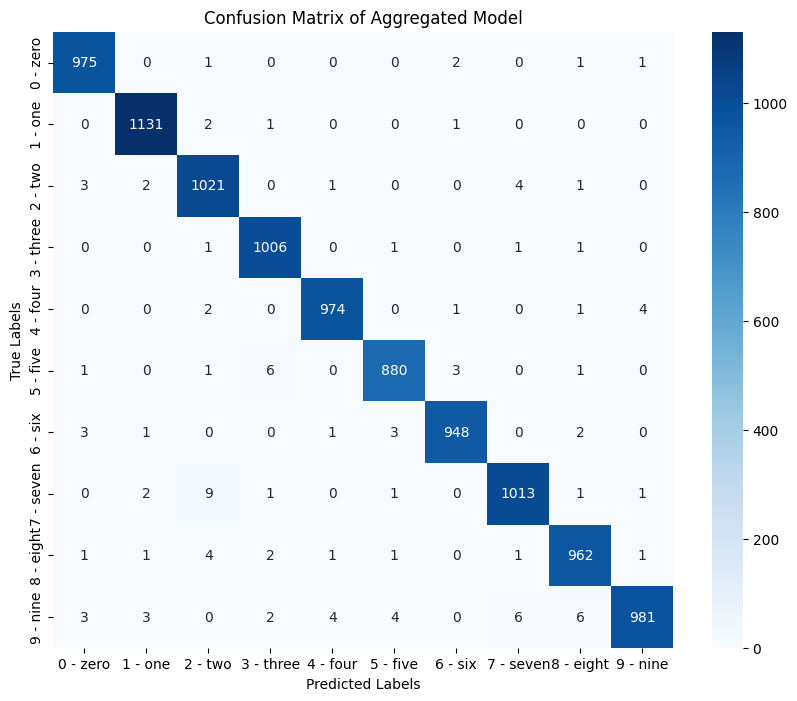

In [39]:
evaluate_aggregated_model(results, classes)

# SISA re-train

## Paths to data info

In [66]:
mnist_samples_to_delete = Path("..") / 'naive' / 'mnist_samples_to_unlearn_20per.json'
mnist_sisa_structure = 'sisa_structure.json'
updated_sisa_structure = 'updated_sisa_strucute.json'
deleted_samples = 'deleted_samples.json'

## Update sisa structure -> delete samples 

In [67]:
affected_shards = update_sisa_structure(mnist_samples_to_delete, mnist_sisa_structure, updated_sisa_structure,deleted_samples)

Retraining Plan:
  Shard: shard_0, Start from Slice: slice_0 onward
  Shard: shard_1, Start from Slice: slice_0 onward
  Shard: shard_2, Start from Slice: slice_0 onward


## Recreate DataLoaders from json file

In [68]:
dataloaders, classes = recreate_sisa_dataloaders(
    datasets=(train_dataset, test_dataset),
    info_file_path=updated_sisa_structure,
    batch_size=BATCH_SIZE,
    val_ratio=0.1
)

## Models output path

In [69]:
save_path = "./sisa_updated_models"

## Retrain the affected shards

In [70]:
import time
start_time = time.perf_counter()

retrain_sisa_framework(
    dataloaders=dataloaders,
    affected_shards=affected_shards,
    num_epochs=EPOCHS,
    save_models_metrics_dir=save_path,
    init_model_func=init_model_cnn, 
    learning_rate=LEARNING_RATE
)

end_time = time.perf_counter()  # End timer
elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.6f} seconds")

Retraining shard: shard_0
Init model...
Done initializing model.
Model ID: 132130245269952, Optimizer ID: 132129999366624, Criterion ID: 132129999366528
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.92it/s]


Epoch [1/10], Train Loss: 1.2202, Train Accuracy: 0.6414, Val Loss: 0.3929, Val Accuracy: 0.8660
Epoch 1: New best validation accuracy: 0.8660. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.62it/s]


Epoch [2/10], Train Loss: 0.3246, Train Accuracy: 0.9065, Val Loss: 0.1924, Val Accuracy: 0.9502
Epoch 2: New best validation accuracy: 0.9502. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 104.27it/s]


Epoch [3/10], Train Loss: 0.2038, Train Accuracy: 0.9372, Val Loss: 0.1790, Val Accuracy: 0.9408


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 110.04it/s]


Epoch [4/10], Train Loss: 0.1388, Train Accuracy: 0.9569, Val Loss: 0.1364, Val Accuracy: 0.9595
Epoch 4: New best validation accuracy: 0.9595. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.89it/s]


Epoch [5/10], Train Loss: 0.1033, Train Accuracy: 0.9720, Val Loss: 0.1184, Val Accuracy: 0.9626
Epoch 5: New best validation accuracy: 0.9626. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 102.61it/s]


Epoch [6/10], Train Loss: 0.0765, Train Accuracy: 0.9762, Val Loss: 0.0971, Val Accuracy: 0.9751
Epoch 6: New best validation accuracy: 0.9751. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 100.89it/s]


Epoch [7/10], Train Loss: 0.0557, Train Accuracy: 0.9862, Val Loss: 0.0958, Val Accuracy: 0.9782
Epoch 7: New best validation accuracy: 0.9782. Model saved to ./sisa_updated_models/shard_0_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.70it/s]


Epoch [8/10], Train Loss: 0.0416, Train Accuracy: 0.9876, Val Loss: 0.0955, Val Accuracy: 0.9688


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.60it/s]


Epoch [9/10], Train Loss: 0.0334, Train Accuracy: 0.9934, Val Loss: 0.0811, Val Accuracy: 0.9782


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.40it/s]


Epoch [10/10], Train Loss: 0.0287, Train Accuracy: 0.9931, Val Loss: 0.1001, Val Accuracy: 0.9720
Training complete for ./sisa_updated_models/shard_0_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.24it/s]


Epoch [1/10], Train Loss: 0.1253, Train Accuracy: 0.9626, Val Loss: 0.1136, Val Accuracy: 0.9500
Epoch 1: New best validation accuracy: 0.9500. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.96it/s]


Epoch [2/10], Train Loss: 0.0791, Train Accuracy: 0.9740, Val Loss: 0.1116, Val Accuracy: 0.9563
Epoch 2: New best validation accuracy: 0.9563. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.43it/s]


Epoch [3/10], Train Loss: 0.0460, Train Accuracy: 0.9844, Val Loss: 0.0974, Val Accuracy: 0.9625
Epoch 3: New best validation accuracy: 0.9625. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.39it/s]


Epoch [4/10], Train Loss: 0.0231, Train Accuracy: 0.9927, Val Loss: 0.1002, Val Accuracy: 0.9531


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.84it/s]


Epoch [5/10], Train Loss: 0.0138, Train Accuracy: 0.9983, Val Loss: 0.1091, Val Accuracy: 0.9656
Epoch 5: New best validation accuracy: 0.9656. Model saved to ./sisa_updated_models/shard_0_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.59it/s]


Epoch [6/10], Train Loss: 0.0078, Train Accuracy: 0.9997, Val Loss: 0.1221, Val Accuracy: 0.9563


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.23it/s]


Epoch [7/10], Train Loss: 0.0066, Train Accuracy: 0.9997, Val Loss: 0.1159, Val Accuracy: 0.9625


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.02it/s]


Epoch [8/10], Train Loss: 0.0040, Train Accuracy: 1.0000, Val Loss: 0.1222, Val Accuracy: 0.9594


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.91it/s]


Epoch [9/10], Train Loss: 0.0033, Train Accuracy: 1.0000, Val Loss: 0.1178, Val Accuracy: 0.9656


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.42it/s]


Epoch [10/10], Train Loss: 0.0026, Train Accuracy: 1.0000, Val Loss: 0.1189, Val Accuracy: 0.9531
Training complete for ./sisa_updated_models/shard_0_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.91it/s]


Epoch [1/10], Train Loss: 0.1609, Train Accuracy: 0.9587, Val Loss: 0.0857, Val Accuracy: 0.9781
Epoch 1: New best validation accuracy: 0.9781. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 82.43it/s]


Epoch [2/10], Train Loss: 0.0607, Train Accuracy: 0.9830, Val Loss: 0.0588, Val Accuracy: 0.9812
Epoch 2: New best validation accuracy: 0.9812. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.56it/s]


Epoch [3/10], Train Loss: 0.0272, Train Accuracy: 0.9927, Val Loss: 0.0765, Val Accuracy: 0.9843
Epoch 3: New best validation accuracy: 0.9843. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.19it/s]


Epoch [4/10], Train Loss: 0.0148, Train Accuracy: 0.9962, Val Loss: 0.0539, Val Accuracy: 0.9843


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.72it/s]


Epoch [5/10], Train Loss: 0.0080, Train Accuracy: 0.9983, Val Loss: 0.0659, Val Accuracy: 0.9812


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 80.40it/s]


Epoch [6/10], Train Loss: 0.0060, Train Accuracy: 0.9993, Val Loss: 0.0561, Val Accuracy: 0.9812


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.43it/s]


Epoch [7/10], Train Loss: 0.0041, Train Accuracy: 0.9997, Val Loss: 0.0553, Val Accuracy: 0.9937
Epoch 7: New best validation accuracy: 0.9937. Model saved to ./sisa_updated_models/shard_0_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 82.82it/s]


Epoch [8/10], Train Loss: 0.0032, Train Accuracy: 0.9993, Val Loss: 0.0570, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 96.67it/s]


Epoch [9/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.0555, Val Accuracy: 0.9906


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 77.31it/s]


Epoch [10/10], Train Loss: 0.0013, Train Accuracy: 1.0000, Val Loss: 0.0555, Val Accuracy: 0.9875
Training complete for ./sisa_updated_models/shard_0_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.81it/s]


Epoch [1/10], Train Loss: 0.0940, Train Accuracy: 0.9738, Val Loss: 0.0763, Val Accuracy: 0.9752
Epoch 1: New best validation accuracy: 0.9752. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 110.06it/s]


Epoch [2/10], Train Loss: 0.0339, Train Accuracy: 0.9873, Val Loss: 0.0679, Val Accuracy: 0.9720


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.44it/s]


Epoch [3/10], Train Loss: 0.0120, Train Accuracy: 0.9966, Val Loss: 0.0616, Val Accuracy: 0.9783
Epoch 3: New best validation accuracy: 0.9783. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.69it/s]


Epoch [4/10], Train Loss: 0.0041, Train Accuracy: 0.9993, Val Loss: 0.0646, Val Accuracy: 0.9814
Epoch 4: New best validation accuracy: 0.9814. Model saved to ./sisa_updated_models/shard_0_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.06it/s]


Epoch [5/10], Train Loss: 0.0017, Train Accuracy: 1.0000, Val Loss: 0.0639, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 105.32it/s]


Epoch [6/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0643, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 110.98it/s]


Epoch [7/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0658, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.53it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0649, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.41it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0650, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.86it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0659, Val Accuracy: 0.9783
Training complete for ./sisa_updated_models/shard_0_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 111.76it/s]


Epoch [1/10], Train Loss: 0.0969, Train Accuracy: 0.9716, Val Loss: 0.1027, Val Accuracy: 0.9782
Epoch 1: New best validation accuracy: 0.9782. Model saved to ./sisa_updated_models/shard_0_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 101.18it/s]


Epoch [2/10], Train Loss: 0.0411, Train Accuracy: 0.9869, Val Loss: 0.1097, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 104.47it/s]


Epoch [3/10], Train Loss: 0.0189, Train Accuracy: 0.9941, Val Loss: 0.1288, Val Accuracy: 0.9688


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.88it/s]


Epoch [4/10], Train Loss: 0.0079, Train Accuracy: 0.9983, Val Loss: 0.1212, Val Accuracy: 0.9720


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 110.14it/s]


Epoch [5/10], Train Loss: 0.0040, Train Accuracy: 0.9990, Val Loss: 0.1183, Val Accuracy: 0.9782


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.99it/s]


Epoch [6/10], Train Loss: 0.0029, Train Accuracy: 0.9993, Val Loss: 0.1355, Val Accuracy: 0.9782


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.37it/s]


Epoch [7/10], Train Loss: 0.0011, Train Accuracy: 1.0000, Val Loss: 0.1259, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 99.94it/s]


Epoch [8/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.1344, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.78it/s]


Epoch [9/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1382, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.51it/s]


Epoch [10/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1424, Val Accuracy: 0.9751
Training complete for ./sisa_updated_models/shard_0_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_0_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_0 to ./sisa_updated_models/shard_0_final_model.pth
Retraining shard: shard_1
Init model...
Done initializing model.
Model ID: 132130243717168, Optimizer ID: 132130245270000, Criterion ID: 132130245263952
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.34it/s]


Epoch [1/10], Train Loss: 1.2014, Train Accuracy: 0.6236, Val Loss: 0.4568, Val Accuracy: 0.8386
Epoch 1: New best validation accuracy: 0.8386. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.53it/s]


Epoch [2/10], Train Loss: 0.3398, Train Accuracy: 0.9015, Val Loss: 0.2537, Val Accuracy: 0.9209
Epoch 2: New best validation accuracy: 0.9209. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.87it/s]


Epoch [3/10], Train Loss: 0.2094, Train Accuracy: 0.9383, Val Loss: 0.1700, Val Accuracy: 0.9525
Epoch 3: New best validation accuracy: 0.9525. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.23it/s]


Epoch [4/10], Train Loss: 0.1451, Train Accuracy: 0.9618, Val Loss: 0.1342, Val Accuracy: 0.9494


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.64it/s]


Epoch [5/10], Train Loss: 0.1036, Train Accuracy: 0.9751, Val Loss: 0.1054, Val Accuracy: 0.9684
Epoch 5: New best validation accuracy: 0.9684. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.72it/s]


Epoch [6/10], Train Loss: 0.0950, Train Accuracy: 0.9692, Val Loss: 0.0934, Val Accuracy: 0.9747
Epoch 6: New best validation accuracy: 0.9747. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.80it/s]


Epoch [7/10], Train Loss: 0.0714, Train Accuracy: 0.9793, Val Loss: 0.0843, Val Accuracy: 0.9715


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.44it/s]


Epoch [8/10], Train Loss: 0.0465, Train Accuracy: 0.9877, Val Loss: 0.0925, Val Accuracy: 0.9589


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 85.17it/s]


Epoch [9/10], Train Loss: 0.0372, Train Accuracy: 0.9909, Val Loss: 0.0817, Val Accuracy: 0.9778
Epoch 9: New best validation accuracy: 0.9778. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.94it/s]


Epoch [10/10], Train Loss: 0.0243, Train Accuracy: 0.9944, Val Loss: 0.0582, Val Accuracy: 0.9842
Epoch 10: New best validation accuracy: 0.9842. Model saved to ./sisa_updated_models/shard_1_slice_0_CNN_MNIST_model.pth.
Training complete for ./sisa_updated_models/shard_1_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.49it/s]


Epoch [1/10], Train Loss: 0.1214, Train Accuracy: 0.9638, Val Loss: 0.1147, Val Accuracy: 0.9749
Epoch 1: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.55it/s]


Epoch [2/10], Train Loss: 0.0609, Train Accuracy: 0.9781, Val Loss: 0.1339, Val Accuracy: 0.9687


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.32it/s]


Epoch [3/10], Train Loss: 0.0344, Train Accuracy: 0.9892, Val Loss: 0.1080, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 87.20it/s]


Epoch [4/10], Train Loss: 0.0230, Train Accuracy: 0.9934, Val Loss: 0.1464, Val Accuracy: 0.9561


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.38it/s]


Epoch [5/10], Train Loss: 0.0161, Train Accuracy: 0.9972, Val Loss: 0.1429, Val Accuracy: 0.9530


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 87.72it/s]


Epoch [6/10], Train Loss: 0.0122, Train Accuracy: 0.9969, Val Loss: 0.1280, Val Accuracy: 0.9592


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.87it/s]


Epoch [7/10], Train Loss: 0.0072, Train Accuracy: 0.9993, Val Loss: 0.1363, Val Accuracy: 0.9687


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.54it/s]


Epoch [8/10], Train Loss: 0.0046, Train Accuracy: 0.9990, Val Loss: 0.1252, Val Accuracy: 0.9781
Epoch 8: New best validation accuracy: 0.9781. Model saved to ./sisa_updated_models/shard_1_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 82.30it/s]


Epoch [9/10], Train Loss: 0.0024, Train Accuracy: 1.0000, Val Loss: 0.1209, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.96it/s]


Epoch [10/10], Train Loss: 0.0018, Train Accuracy: 1.0000, Val Loss: 0.1292, Val Accuracy: 0.9718
Training complete for ./sisa_updated_models/shard_1_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.93it/s]


Epoch [1/10], Train Loss: 0.1422, Train Accuracy: 0.9615, Val Loss: 0.1256, Val Accuracy: 0.9558
Epoch 1: New best validation accuracy: 0.9558. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.44it/s]


Epoch [2/10], Train Loss: 0.0497, Train Accuracy: 0.9846, Val Loss: 0.1266, Val Accuracy: 0.9558


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.89it/s]


Epoch [3/10], Train Loss: 0.0309, Train Accuracy: 0.9902, Val Loss: 0.0884, Val Accuracy: 0.9716
Epoch 3: New best validation accuracy: 0.9716. Model saved to ./sisa_updated_models/shard_1_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.37it/s]


Epoch [4/10], Train Loss: 0.0105, Train Accuracy: 0.9972, Val Loss: 0.1054, Val Accuracy: 0.9653


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 87.76it/s]


Epoch [5/10], Train Loss: 0.0045, Train Accuracy: 1.0000, Val Loss: 0.0897, Val Accuracy: 0.9653


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.76it/s]


Epoch [6/10], Train Loss: 0.0024, Train Accuracy: 1.0000, Val Loss: 0.0934, Val Accuracy: 0.9716


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.21it/s]


Epoch [7/10], Train Loss: 0.0015, Train Accuracy: 1.0000, Val Loss: 0.0990, Val Accuracy: 0.9685


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.22it/s]


Epoch [8/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0940, Val Accuracy: 0.9685


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 83.61it/s]


Epoch [9/10], Train Loss: 0.0010, Train Accuracy: 1.0000, Val Loss: 0.0975, Val Accuracy: 0.9716


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.09it/s]


Epoch [10/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.1012, Val Accuracy: 0.9716
Training complete for ./sisa_updated_models/shard_1_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.71it/s]


Epoch [1/10], Train Loss: 0.1141, Train Accuracy: 0.9662, Val Loss: 0.1338, Val Accuracy: 0.9477
Epoch 1: New best validation accuracy: 0.9477. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.70it/s]


Epoch [2/10], Train Loss: 0.0557, Train Accuracy: 0.9833, Val Loss: 0.0664, Val Accuracy: 0.9723
Epoch 2: New best validation accuracy: 0.9723. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.45it/s]


Epoch [3/10], Train Loss: 0.0194, Train Accuracy: 0.9952, Val Loss: 0.0646, Val Accuracy: 0.9754
Epoch 3: New best validation accuracy: 0.9754. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.02it/s]


Epoch [4/10], Train Loss: 0.0085, Train Accuracy: 0.9980, Val Loss: 0.0430, Val Accuracy: 0.9815
Epoch 4: New best validation accuracy: 0.9815. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 105.78it/s]


Epoch [5/10], Train Loss: 0.0070, Train Accuracy: 0.9993, Val Loss: 0.0432, Val Accuracy: 0.9815


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 95.37it/s]


Epoch [6/10], Train Loss: 0.0024, Train Accuracy: 1.0000, Val Loss: 0.0411, Val Accuracy: 0.9908
Epoch 6: New best validation accuracy: 0.9908. Model saved to ./sisa_updated_models/shard_1_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.11it/s]


Epoch [7/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0381, Val Accuracy: 0.9846


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 102.38it/s]


Epoch [8/10], Train Loss: 0.0009, Train Accuracy: 1.0000, Val Loss: 0.0376, Val Accuracy: 0.9846


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 102.80it/s]


Epoch [9/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0385, Val Accuracy: 0.9846


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 105.36it/s]


Epoch [10/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0383, Val Accuracy: 0.9846
Training complete for ./sisa_updated_models/shard_1_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.89it/s]


Epoch [1/10], Train Loss: 0.0866, Train Accuracy: 0.9741, Val Loss: 0.1064, Val Accuracy: 0.9689
Epoch 1: New best validation accuracy: 0.9689. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.23it/s]


Epoch [2/10], Train Loss: 0.0392, Train Accuracy: 0.9872, Val Loss: 0.1030, Val Accuracy: 0.9720
Epoch 2: New best validation accuracy: 0.9720. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 111.29it/s]


Epoch [3/10], Train Loss: 0.0114, Train Accuracy: 0.9959, Val Loss: 0.1053, Val Accuracy: 0.9752
Epoch 3: New best validation accuracy: 0.9752. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.44it/s]


Epoch [4/10], Train Loss: 0.0071, Train Accuracy: 0.9976, Val Loss: 0.1237, Val Accuracy: 0.9689


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 102.18it/s]


Epoch [5/10], Train Loss: 0.0047, Train Accuracy: 0.9983, Val Loss: 0.1265, Val Accuracy: 0.9689


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.29it/s]


Epoch [6/10], Train Loss: 0.0032, Train Accuracy: 0.9990, Val Loss: 0.1313, Val Accuracy: 0.9720


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 112.17it/s]


Epoch [7/10], Train Loss: 0.0015, Train Accuracy: 0.9997, Val Loss: 0.1286, Val Accuracy: 0.9783
Epoch 7: New best validation accuracy: 0.9783. Model saved to ./sisa_updated_models/shard_1_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.15it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.1342, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 107.10it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.1374, Val Accuracy: 0.9783


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 103.20it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.1397, Val Accuracy: 0.9783
Training complete for ./sisa_updated_models/shard_1_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_1_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_1 to ./sisa_updated_models/shard_1_final_model.pth
Retraining shard: shard_2
Init model...
Done initializing model.
Model ID: 132130243715728, Optimizer ID: 132129976040656, Criterion ID: 132129976039312
  Retraining slice: slice_0


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.20it/s]


Epoch [1/10], Train Loss: 1.0401, Train Accuracy: 0.7025, Val Loss: 0.3687, Val Accuracy: 0.8829
Epoch 1: New best validation accuracy: 0.8829. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 75.07it/s]


Epoch [2/10], Train Loss: 0.3153, Train Accuracy: 0.9023, Val Loss: 0.2031, Val Accuracy: 0.9494
Epoch 2: New best validation accuracy: 0.9494. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.35it/s]


Epoch [3/10], Train Loss: 0.1818, Train Accuracy: 0.9437, Val Loss: 0.1920, Val Accuracy: 0.9399


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.99it/s]


Epoch [4/10], Train Loss: 0.1328, Train Accuracy: 0.9575, Val Loss: 0.1412, Val Accuracy: 0.9557
Epoch 4: New best validation accuracy: 0.9557. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.29it/s]


Epoch [5/10], Train Loss: 0.0874, Train Accuracy: 0.9736, Val Loss: 0.1143, Val Accuracy: 0.9557


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 96.84it/s]


Epoch [6/10], Train Loss: 0.0632, Train Accuracy: 0.9803, Val Loss: 0.0769, Val Accuracy: 0.9715
Epoch 6: New best validation accuracy: 0.9715. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.48it/s]


Epoch [7/10], Train Loss: 0.0420, Train Accuracy: 0.9880, Val Loss: 0.0895, Val Accuracy: 0.9747
Epoch 7: New best validation accuracy: 0.9747. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 84.25it/s]


Epoch [8/10], Train Loss: 0.0336, Train Accuracy: 0.9916, Val Loss: 0.0687, Val Accuracy: 0.9810
Epoch 8: New best validation accuracy: 0.9810. Model saved to ./sisa_updated_models/shard_2_slice_0_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.62it/s]


Epoch [9/10], Train Loss: 0.0267, Train Accuracy: 0.9937, Val Loss: 0.0856, Val Accuracy: 0.9747


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.96it/s]


Epoch [10/10], Train Loss: 0.0188, Train Accuracy: 0.9947, Val Loss: 0.0883, Val Accuracy: 0.9747
Training complete for ./sisa_updated_models/shard_2_slice_0_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_0_CNN_MNIST_history.json'.
  Retraining slice: slice_1


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.99it/s]


Epoch [1/10], Train Loss: 0.1571, Train Accuracy: 0.9613, Val Loss: 0.1052, Val Accuracy: 0.9813
Epoch 1: New best validation accuracy: 0.9813. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 99.48it/s]


Epoch [2/10], Train Loss: 0.0695, Train Accuracy: 0.9786, Val Loss: 0.1121, Val Accuracy: 0.9688


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 105.41it/s]


Epoch [3/10], Train Loss: 0.0479, Train Accuracy: 0.9844, Val Loss: 0.0998, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 109.40it/s]


Epoch [4/10], Train Loss: 0.0407, Train Accuracy: 0.9869, Val Loss: 0.0745, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 104.88it/s]


Epoch [5/10], Train Loss: 0.0170, Train Accuracy: 0.9972, Val Loss: 0.0651, Val Accuracy: 0.9875
Epoch 5: New best validation accuracy: 0.9875. Model saved to ./sisa_updated_models/shard_2_slice_1_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 113.21it/s]


Epoch [6/10], Train Loss: 0.0090, Train Accuracy: 0.9990, Val Loss: 0.0738, Val Accuracy: 0.9751


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.43it/s]


Epoch [7/10], Train Loss: 0.0058, Train Accuracy: 1.0000, Val Loss: 0.0789, Val Accuracy: 0.9813


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 108.38it/s]


Epoch [8/10], Train Loss: 0.0037, Train Accuracy: 1.0000, Val Loss: 0.0905, Val Accuracy: 0.9782


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 102.68it/s]


Epoch [9/10], Train Loss: 0.0028, Train Accuracy: 1.0000, Val Loss: 0.0783, Val Accuracy: 0.9813


Evaluating on validation set...: 100%|██████████| 6/6 [00:00<00:00, 106.79it/s]


Epoch [10/10], Train Loss: 0.0020, Train Accuracy: 1.0000, Val Loss: 0.0795, Val Accuracy: 0.9813
Training complete for ./sisa_updated_models/shard_2_slice_1_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_1_CNN_MNIST_history.json'.
  Retraining slice: slice_2


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.20it/s]


Epoch [1/10], Train Loss: 0.1242, Train Accuracy: 0.9631, Val Loss: 0.1183, Val Accuracy: 0.9655
Epoch 1: New best validation accuracy: 0.9655. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.15it/s]


Epoch [2/10], Train Loss: 0.0559, Train Accuracy: 0.9829, Val Loss: 0.0994, Val Accuracy: 0.9687
Epoch 2: New best validation accuracy: 0.9687. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.98it/s]


Epoch [3/10], Train Loss: 0.0315, Train Accuracy: 0.9909, Val Loss: 0.0867, Val Accuracy: 0.9781
Epoch 3: New best validation accuracy: 0.9781. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.92it/s]


Epoch [4/10], Train Loss: 0.0154, Train Accuracy: 0.9958, Val Loss: 0.0517, Val Accuracy: 0.9812
Epoch 4: New best validation accuracy: 0.9812. Model saved to ./sisa_updated_models/shard_2_slice_2_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.99it/s]


Epoch [5/10], Train Loss: 0.0127, Train Accuracy: 0.9962, Val Loss: 0.0652, Val Accuracy: 0.9812


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.90it/s]


Epoch [6/10], Train Loss: 0.0048, Train Accuracy: 0.9993, Val Loss: 0.0707, Val Accuracy: 0.9718


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.48it/s]


Epoch [7/10], Train Loss: 0.0030, Train Accuracy: 0.9997, Val Loss: 0.0707, Val Accuracy: 0.9812


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.51it/s]


Epoch [8/10], Train Loss: 0.0040, Train Accuracy: 0.9986, Val Loss: 0.0707, Val Accuracy: 0.9781


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.25it/s]


Epoch [9/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0637, Val Accuracy: 0.9781


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.86it/s]


Epoch [10/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0659, Val Accuracy: 0.9781
Training complete for ./sisa_updated_models/shard_2_slice_2_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_2_CNN_MNIST_history.json'.
  Retraining slice: slice_3


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.71it/s]


Epoch [1/10], Train Loss: 0.0895, Train Accuracy: 0.9710, Val Loss: 0.0579, Val Accuracy: 0.9779
Epoch 1: New best validation accuracy: 0.9779. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.20it/s]


Epoch [2/10], Train Loss: 0.0306, Train Accuracy: 0.9902, Val Loss: 0.0454, Val Accuracy: 0.9874
Epoch 2: New best validation accuracy: 0.9874. Model saved to ./sisa_updated_models/shard_2_slice_3_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.99it/s]


Epoch [3/10], Train Loss: 0.0114, Train Accuracy: 0.9965, Val Loss: 0.0618, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 88.38it/s]


Epoch [4/10], Train Loss: 0.0063, Train Accuracy: 0.9990, Val Loss: 0.0704, Val Accuracy: 0.9748


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.73it/s]


Epoch [5/10], Train Loss: 0.0037, Train Accuracy: 0.9997, Val Loss: 0.0480, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.69it/s]


Epoch [6/10], Train Loss: 0.0016, Train Accuracy: 0.9997, Val Loss: 0.0463, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.90it/s]


Epoch [7/10], Train Loss: 0.0008, Train Accuracy: 1.0000, Val Loss: 0.0506, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 90.75it/s]


Epoch [8/10], Train Loss: 0.0006, Train Accuracy: 1.0000, Val Loss: 0.0503, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.02it/s]


Epoch [9/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0520, Val Accuracy: 0.9811


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.47it/s]


Epoch [10/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0524, Val Accuracy: 0.9811
Training complete for ./sisa_updated_models/shard_2_slice_3_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_3_CNN_MNIST_history.json'.
  Retraining slice: slice_4


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 95.31it/s]


Epoch [1/10], Train Loss: 0.0873, Train Accuracy: 0.9725, Val Loss: 0.0562, Val Accuracy: 0.9749
Epoch 1: New best validation accuracy: 0.9749. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.85it/s]


Epoch [2/10], Train Loss: 0.0344, Train Accuracy: 0.9882, Val Loss: 0.0266, Val Accuracy: 0.9875
Epoch 2: New best validation accuracy: 0.9875. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 94.49it/s]


Epoch [3/10], Train Loss: 0.0073, Train Accuracy: 0.9983, Val Loss: 0.0299, Val Accuracy: 0.9875


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.00it/s]


Epoch [4/10], Train Loss: 0.0038, Train Accuracy: 0.9997, Val Loss: 0.0168, Val Accuracy: 0.9906
Epoch 4: New best validation accuracy: 0.9906. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.61it/s]


Epoch [5/10], Train Loss: 0.0012, Train Accuracy: 1.0000, Val Loss: 0.0159, Val Accuracy: 0.9906


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 91.84it/s]


Epoch [6/10], Train Loss: 0.0007, Train Accuracy: 1.0000, Val Loss: 0.0148, Val Accuracy: 0.9937
Epoch 6: New best validation accuracy: 0.9937. Model saved to ./sisa_updated_models/shard_2_slice_4_CNN_MNIST_model.pth.


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 89.43it/s]


Epoch [7/10], Train Loss: 0.0005, Train Accuracy: 1.0000, Val Loss: 0.0137, Val Accuracy: 0.9937


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.01it/s]


Epoch [8/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0139, Val Accuracy: 0.9937


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 93.52it/s]


Epoch [9/10], Train Loss: 0.0004, Train Accuracy: 1.0000, Val Loss: 0.0134, Val Accuracy: 0.9937


Evaluating on validation set...: 100%|██████████| 5/5 [00:00<00:00, 92.84it/s]

Epoch [10/10], Train Loss: 0.0003, Train Accuracy: 1.0000, Val Loss: 0.0132, Val Accuracy: 0.9937
Training complete for ./sisa_updated_models/shard_2_slice_4_CNN_MNIST. Training stats saved to './sisa_updated_models/shard_2_slice_4_CNN_MNIST_history.json'.
Saved updated model for shard_2 to ./sisa_updated_models/shard_2_final_model.pth
Execution time: 112.201847 seconds


## Re-test new SISA models

In [71]:
sisa_test(
    dataloaders=dataloaders, 
    saved_models_metrics_dir=save_path, 
    init_model_func=init_model_cnn,
    clear_solo_models_preds=True)

Init model...
Done initializing model.
Model ID: 132130245266928, Optimizer ID: 132129998516624, Criterion ID: 132129998511344
Loading and testing model: ./sisa_updated_models/shard_0_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_0_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 89.84it/s]


Predictions and labels saved to ./sisa_updated_models/shard_0_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132129976038688, Optimizer ID: 132130001556992, Criterion ID: 132129976040608
Loading and testing model: ./sisa_updated_models/shard_1_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_1_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 90.17it/s]


Predictions and labels saved to ./sisa_updated_models/shard_1_CNN_MNIST_predictions.json
Init model...
Done initializing model.
Model ID: 132130245265824, Optimizer ID: 132130001556368, Criterion ID: 132130001557520
Loading and testing model: ./sisa_updated_models/shard_2_CNN_MNIST


Evaluating model: ./sisa_updated_models/shard_2_final_model.pth: 100%|██████████| 157/157 [00:01<00:00, 89.38it/s]

Predictions and labels saved to ./sisa_updated_models/shard_2_CNN_MNIST_predictions.json
Evaluation results saved to sisa_final_evaluation.json


## Shard models assembly (weighted voting, w=accuracy)

In [72]:
with open("sisa_final_evaluation.json", "r") as f:
    results = json.load(f)

Shard shard_0 Metrics:
  Accuracy: 0.9847
  Precision: 0.9847
  Recall: 0.9847
  F1 Score: 0.9847
Shard shard_1 Metrics:
  Accuracy: 0.9837
  Precision: 0.9838
  Recall: 0.9837
  F1 Score: 0.9837
Shard shard_2 Metrics:
  Accuracy: 0.9851
  Precision: 0.9852
  Recall: 0.9851
  F1 Score: 0.9851

Aggregated Model Metrics:
  Accuracy: 0.9878
  Precision: 0.9878
  Recall: 0.9878
  F1 Score: 0.9878


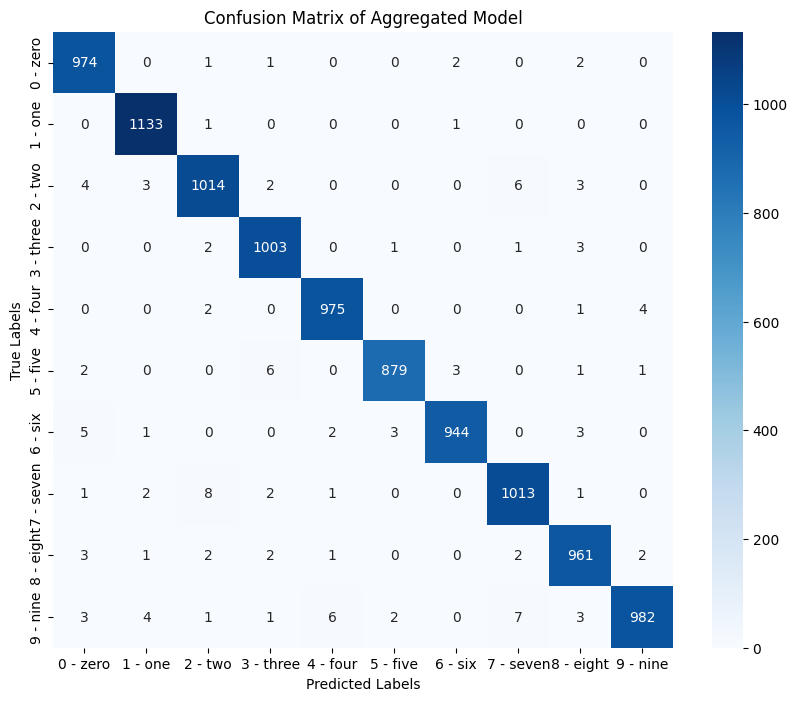

In [73]:
evaluate_aggregated_model(results, classes)